#Introduction to Scikit Learn

##K-Neighbours Regressor

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

In [23]:
X, Y = fetch_california_housing(return_X_y=True)

In [43]:
mod = KNeighborsRegressor().fit(X, Y)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])

In [44]:
pipe.fit(X, Y)
pred = pipe.predict(X)

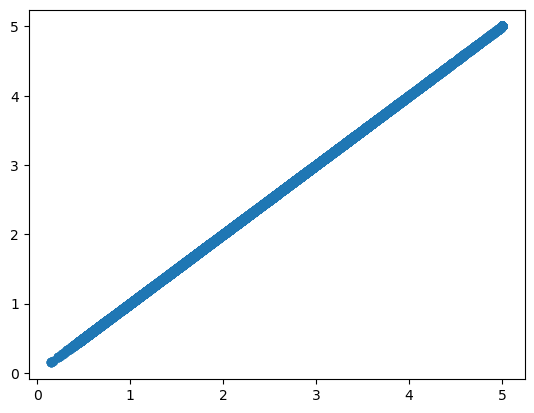

In [45]:
plt.scatter(pred , Y)